<a href="https://colab.research.google.com/github/nandhukumar86/AIML-Practice/blob/master/AdvancedEnsembleTechniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline


In [6]:
y_train = [34, 45, 67, 34, 56, 23, 104, 234, 45, 78]

In [8]:
y_train = np.array(y_train)


In [33]:
x1 = np.random.random((10))
x2 = (45 + np.log(y_train)) * 0.8453

In [34]:
X_train = {'x1': x1, 'x2': x2 }
X_train = pd.DataFrame(X_train, columns=['x1', 'x2'])


In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)

print('Training Score: ', model.score(X_train, y_train))

Training Score:  0.9077441818596458


In [40]:
from sklearn.linear_model import LassoCV

model = LassoCV()

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)

print('Training Score: ', model.score(X_train, y_train))

Training Score:  0.9077408815184912


In [41]:
from sklearn.linear_model import RidgeCV

model = RidgeCV()

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)

print('Training Score: ', model.score(X_train, y_train))

Training Score:  0.9066556501067173


In [42]:
from sklearn.linear_model import ElasticNetCV

model = ElasticNetCV()

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)

print('Training Score: ', model.score(X_train, y_train))

Training Score:  0.8994521211399708


In [66]:
!pip install xgboost

In [67]:
!pip install catboost

     |████████████████████████████████| 66.3MB 52kB/s 


In [91]:
!pip install lightgbm

In [98]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb

In [77]:
model = XGBRegressor(verbosity=0)

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)

print('Training Score: ', model.score(X_train, y_train))

Training Score:  0.9999351048493532


In [75]:
model = CatBoostRegressor(verbose=False)

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)

print('Training Score: ', model.score(X_train, y_train))

Training Score:  0.9998220099367949


In [109]:
from sklearn.metrics import accuracy_score

X_train_lgb = lgb.Dataset(X_train, label=y_train)

params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='regression' #Binary target feature
params['n_estimators']=100
params['max_depth']=10

model = lgb.train(params, X_train_lgb, 100)

y_train_predict = model.predict(X_train)

y_train_predict

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


array([72., 72., 72., 72., 72., 72., 72., 72., 72., 72.])

In [96]:
y_train_predict

array([72., 72., 72., 72., 72., 72., 72., 72., 72., 72.])

In [90]:
from sklearn.ensemble import StackingRegressor, VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

model = StackingRegressor([
                           ('lr', RidgeCV()),
                           ('lasso',LassoCV()),
], final_estimator = CatBoostRegressor(verbose=False), passthrough = True)

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)

print('Training Score: ', model.score(X_train, y_train))

Training Score:  0.9568117335203622


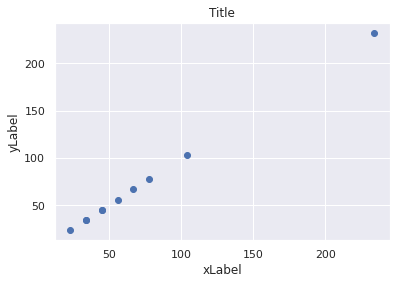

In [80]:
plt.plot(y_train,y_train_predict,'o')
plt.xlabel('xLabel')
plt.ylabel('yLabel')
plt.title('Title')
plt.show()



In [81]:
y_train_predict

array([ 34.21447232,  45.13768261,  66.86706279,  34.1086208 ,
        55.97924527,  23.31310019, 103.50762863, 232.19461562,
        45.14737588,  77.69415701])